In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# File path GMET station data (CSV format with columns:'Precipitation (mm)')
gmet_root_dir = r'C:\Users\c.kwa\Desktop\meteosat_retrieval\data_downloads\GMET\GMet_AWSdata\GMet_AWSdata'

In [3]:
station_data_list_GMET = []
station_name_list_files = []
for station in os.listdir(gmet_root_dir):
    if station.endswith('.csv'):
        station_file = os.path.join(gmet_root_dir, station)
        station_data = pd.read_csv(station_file)
        station_data_list_GMET.append(station_data)
        station_name_list_files.append(station.split('.')[0])
        #display(station_data)

stations_meta_data_GMET = station_data_list_GMET.pop(7)
station_name_list = stations_meta_data_GMET['STN'].tolist()

station_data_gmet_dict = dict(zip(station_name_list, station_data_list_GMET))

for station_name in station_data_gmet_dict:
    # Convert 'timestamp' column to datetime format
    station_data_gmet_dict[station_name]['Timestamp'] = pd.to_datetime(
        station_data_gmet_dict[station_name]['Date'].astype(str) + ' ' + 
        station_data_gmet_dict[station_name]['Time'].astype(str),
        format='%m/%d/%Y %I:%M:%S %p'
    )
    # Set Timestamp as the index
    station_data_gmet_dict[station_name] = station_data_gmet_dict[station_name].set_index('Timestamp')
    # Drop the original Date and Time columns
    station_data_gmet_dict[station_name] = station_data_gmet_dict[station_name].drop(['Date', 'Time'], axis=1)

    # Ensure the column is numeric
    for col in station_data_gmet_dict[station_name].columns:
        station_data_gmet_dict[station_name][col] = pd.to_numeric(station_data_gmet_dict[station_name][col], errors='coerce')

        # Accumulate over 30 minutes
        station_data_gmet_dict[station_name] = station_data_gmet_dict[station_name].resample('30min', label = 'right', closed = 'right').sum(min_count = 2)


In [4]:
# Initialize an empty DataFrame to hold all stations' data
combined_station_data = pd.DataFrame()

# Loop through the station_data_gmet_dict
for station_name, station_data in station_data_gmet_dict.items():
    # Extract the precipitation data, rename the column to the station name
    station_precip = station_data[['Precipitation (mm)']].rename(columns={'Precipitation (mm)': station_name})
    # Merge into the combined DataFrame on the index (Timestamp)
    combined_station_data = pd.merge(
        combined_station_data, station_precip, left_index=True, right_index=True, how='outer'
    )
display(combined_station_data.loc['2022-12'])

,Abetifi,Ada_Foah,Akim_Oda,Akosombo,Akuse,Axim,Enchi,Jirapa,Kalbeo,Kpandai,Loagri,Nakpamboni,Sefwi_Bekwai,Tarkwa,Tema,Tolon,Varenpare,Yendi
Timestamp,,,,,,,,,,,,,,,,,,
2022-12-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-01 00:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-01 01:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-01 01:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-01 02:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 21:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 22:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-12-31 22:30:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_pred = pd.read_csv('df_output_gmet_2022.csv', index_col = 0, parse_dates = True)
df_pred[df_pred <= 0.02] = 0

df_target = pd.read_csv('df_target_gmet_2022.csv', index_col = 0, parse_dates = True)
df_target[df_target <= 0.02] = 0

In [6]:
def hist_plot(df_satellite, df_station, df_target, station):
    # Resample data to monthly and compute the sum
    monthly_satellite = df_satellite.loc['2022'].resample('ME').sum()
    monthly_gauge = df_station.loc['2022'].resample('ME').sum()

    monthly_target = df_target.loc['2022'].resample('ME').sum()
    
    # # Create a new DataFrame to store the sums for each month
    # monthly_comparison = pd.DataFrame({
    #     'Satellite': monthly_satellite.sum(axis=1),
    #     'Gauge': monthly_gauge.sum(axis=1)
    # })
    
    # Group data by month name for the x-axis labels
    monthly_satellite['Month'] = monthly_satellite.index.strftime('%B')
    monthly_satellite_grouped = monthly_satellite.groupby('Month').sum()
    
    # Group data by month name for the x-axis labels
    monthly_gauge['Month'] = monthly_gauge.index.strftime('%B')
    monthly_gauge_grouped = monthly_gauge.groupby('Month').sum()

    # Group data by month name for the x-axis labels
    monthly_target['Month'] = monthly_target.index.strftime('%B')
    monthly_target_grouped = monthly_target.groupby('Month').sum()
    
    # Ensure months are in calendar order
    ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                      'July', 'August', 'September', 'October', 'November', 'December']
    
    monthly_satellite_grouped = monthly_satellite_grouped.reindex(ordered_months)
    monthly_gauge_grouped = monthly_gauge_grouped.reindex(ordered_months)
    monthly_target_grouped = monthly_target_grouped.reindex(ordered_months)


    # Plotting the histogram
    plt.figure(figsize=(12, 6))
    bar_width = 0.20
    x = range(len(monthly_satellite_grouped.index))
    plt.bar(x, monthly_satellite_grouped[station], width=bar_width, label='Satellite', alpha=0.7)
    plt.bar([i + bar_width for i in x], monthly_gauge_grouped[station], width=bar_width, label='Gauge', alpha=0.7)
    plt.bar([i + bar_width * 2 for i in x], monthly_target_grouped[station], width=bar_width, label='Target', alpha=0.7)
    
    # Customize the plot
    plt.xlabel('Month')
    plt.ylabel('Sum')
    plt.title(f'Monthly Sum Comparison: Satellite vs. Gauge {station}')
    plt.xticks([i + bar_width / 2 for i in x], monthly_satellite_grouped.index, rotation=45)
    plt.legend()
    plt.tight_layout()

    #plt.savefig(f'cumalitive_comparison2022_{station}.png')
    
    # Show the plot
    plt.show()

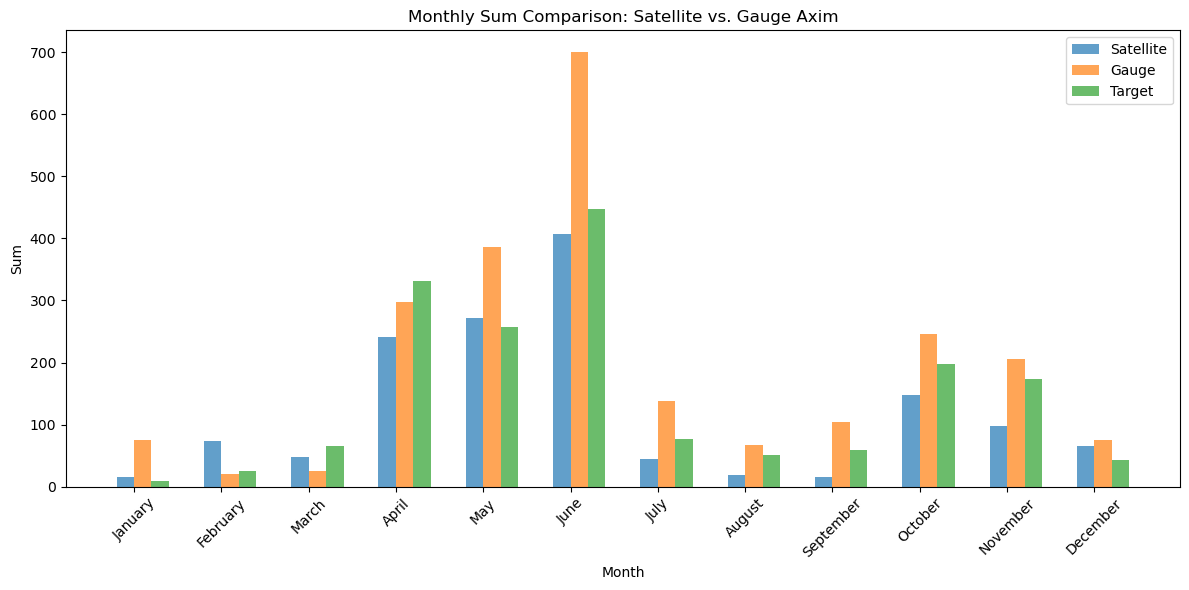

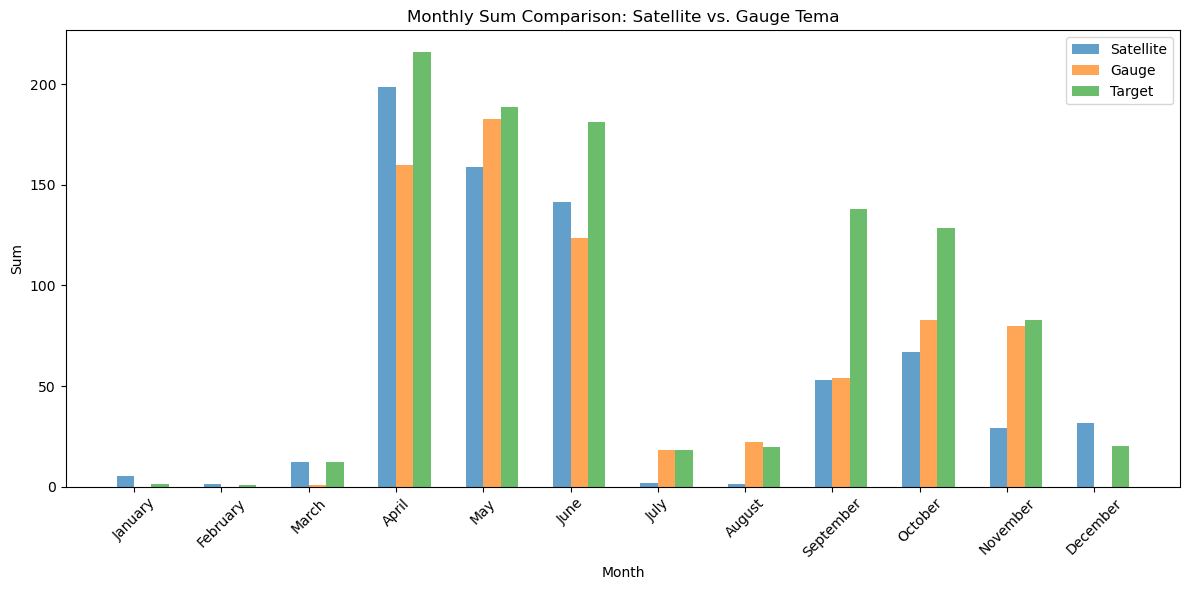

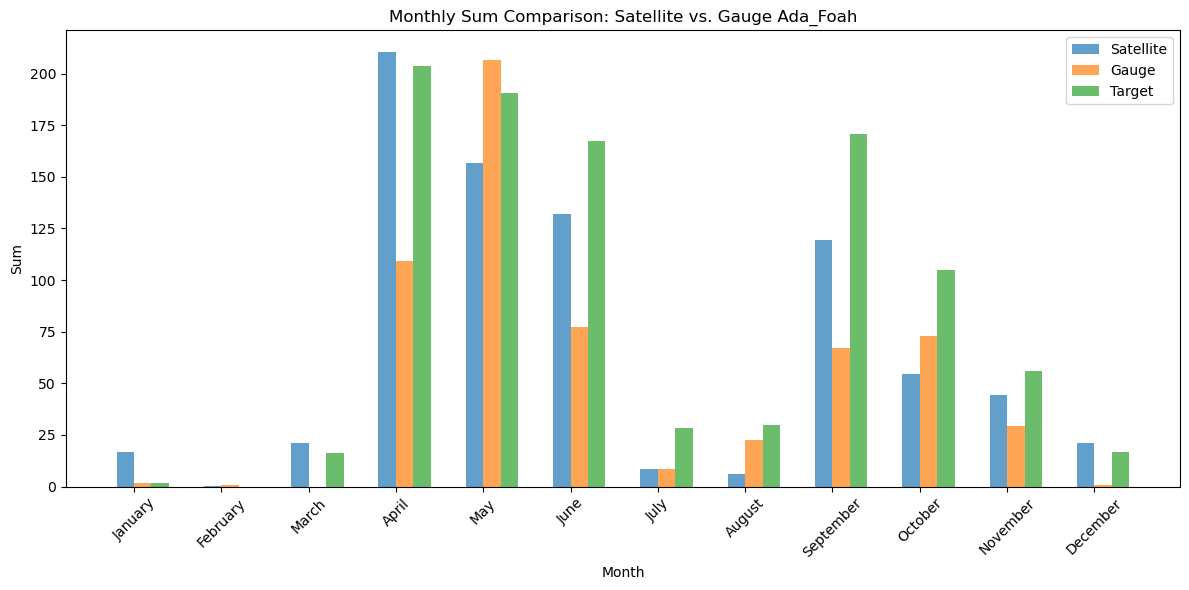

In [7]:
hist_plot(df_pred, combined_station_data, df_target, 'Axim')
hist_plot(df_pred, combined_station_data, df_target, 'Tema')
hist_plot(df_pred, combined_station_data, df_target, 'Ada_Foah')

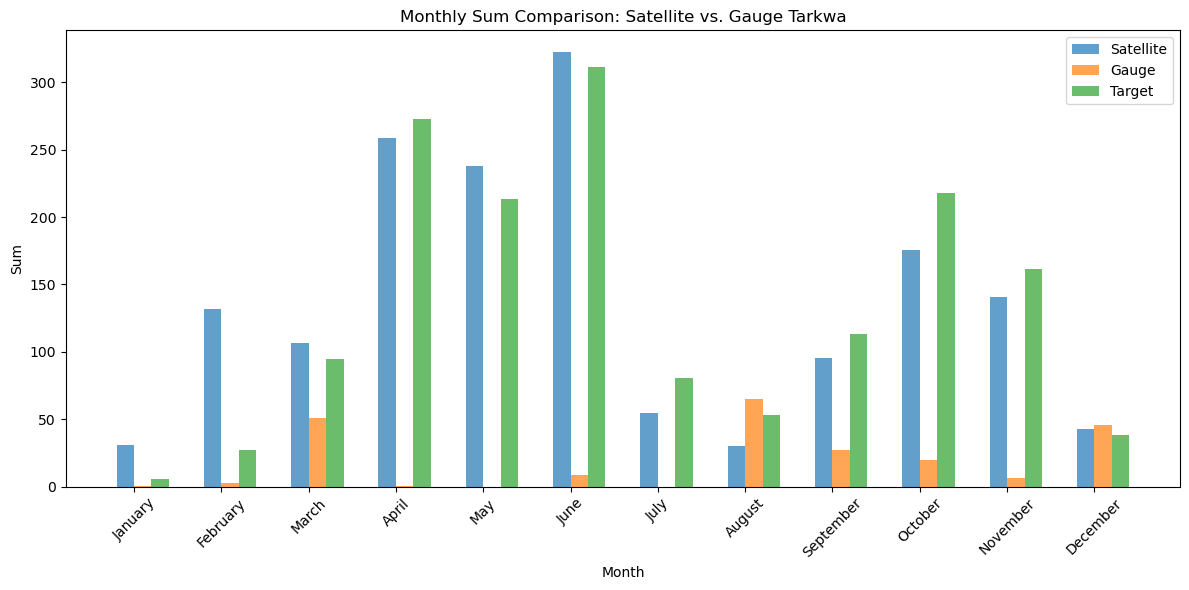

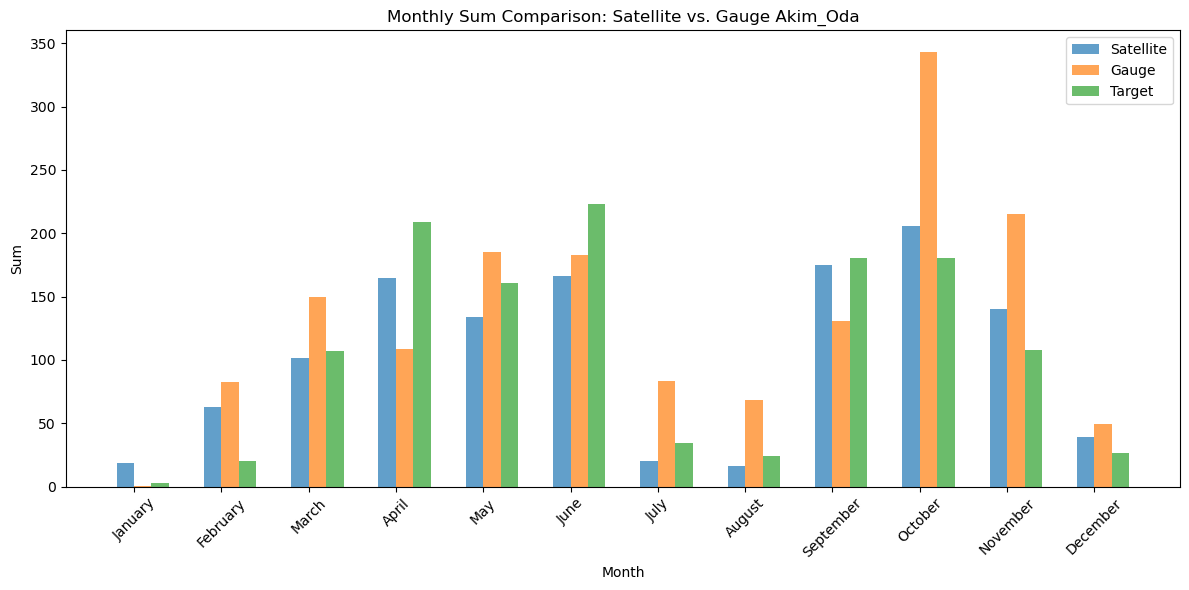

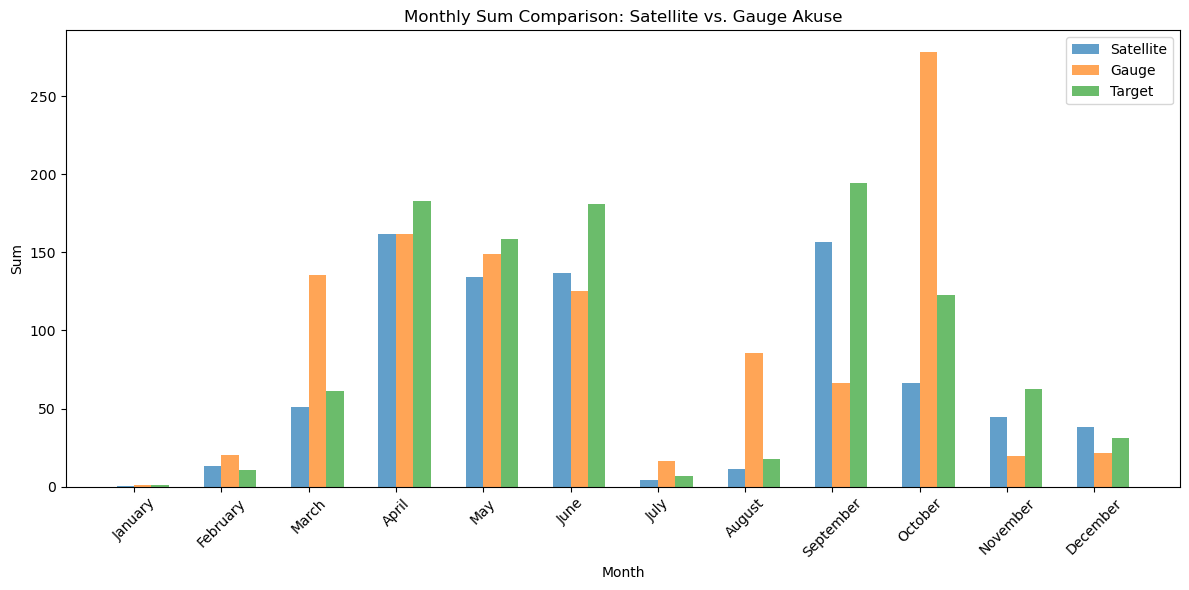

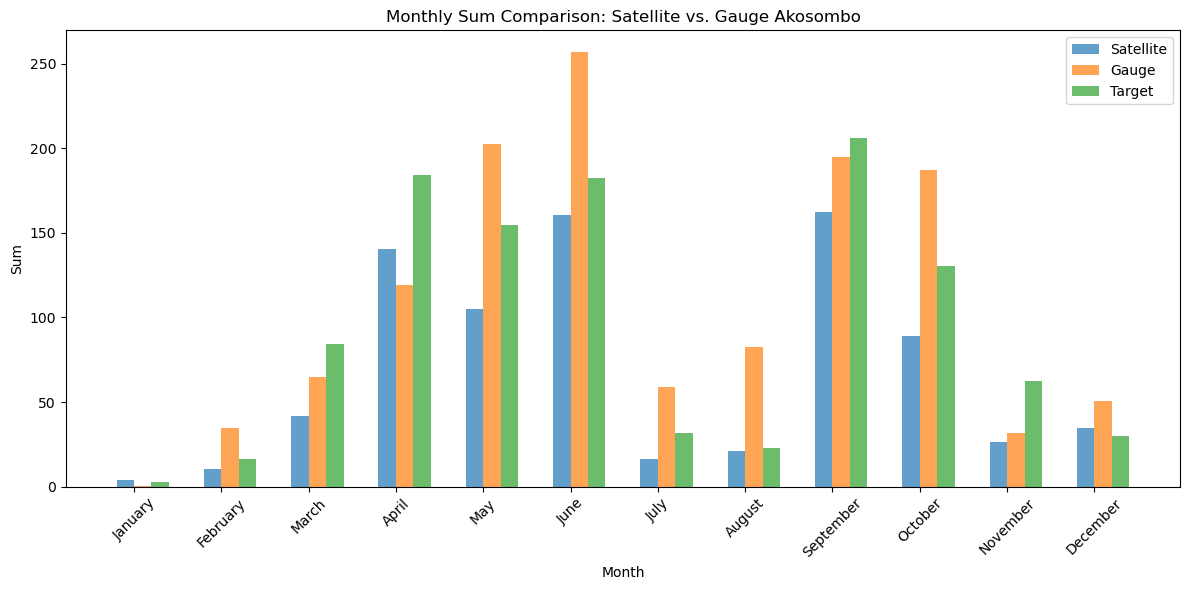

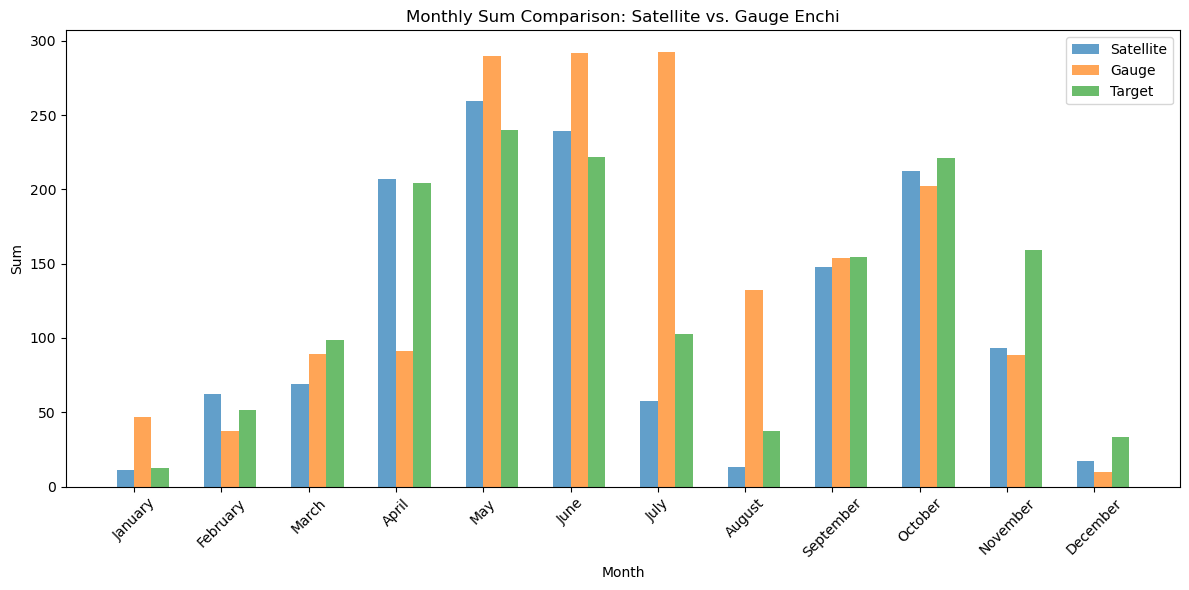

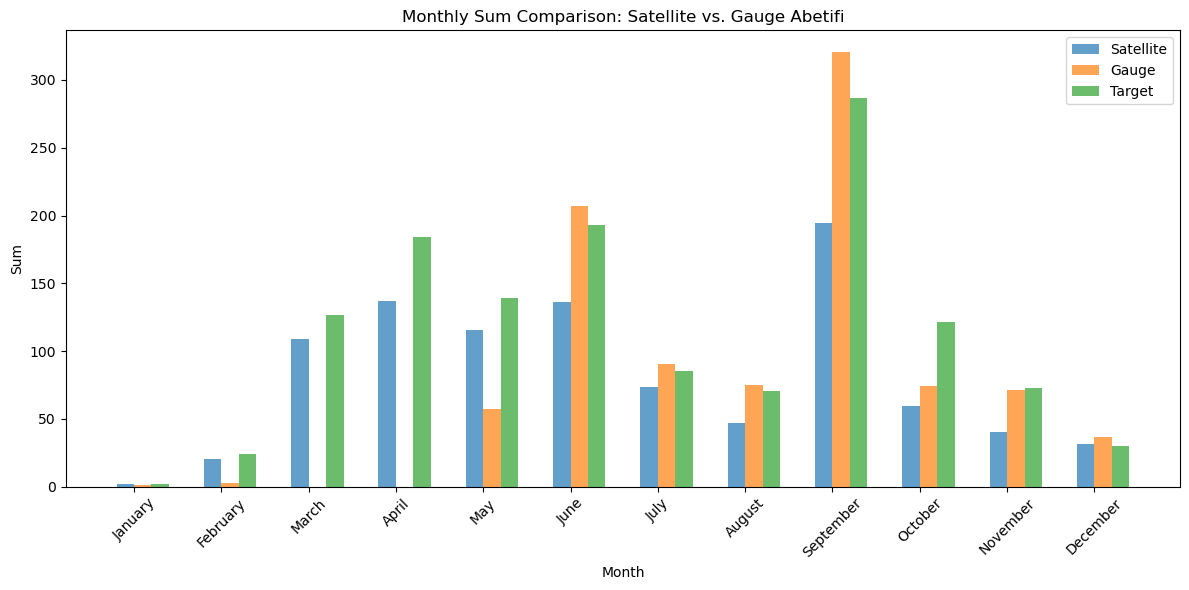

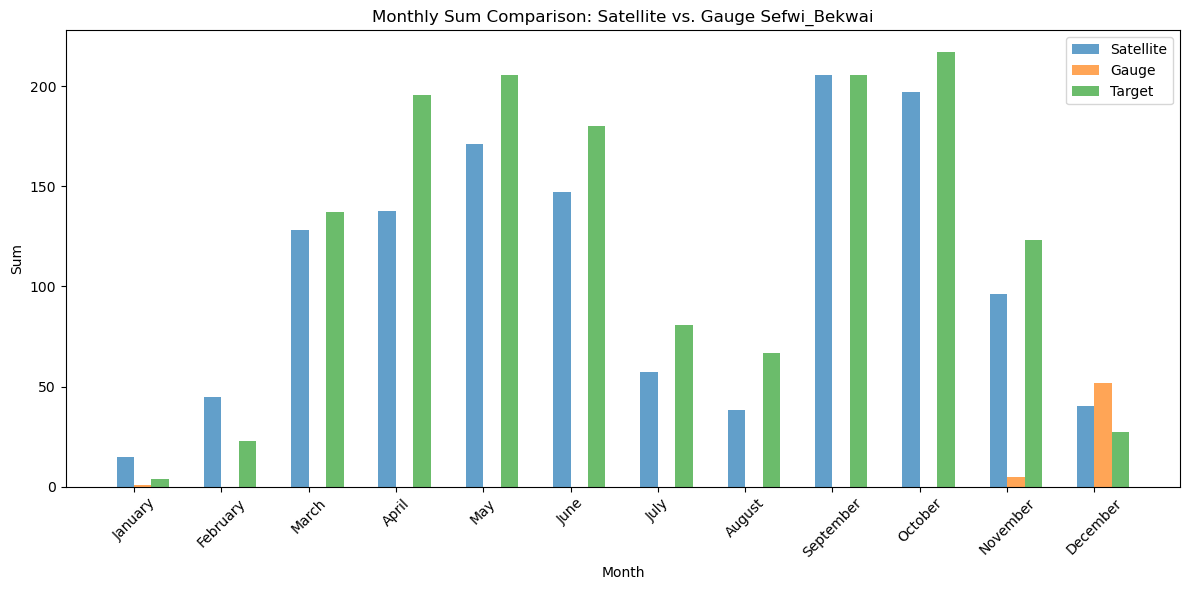

In [8]:
hist_plot(df_pred, combined_station_data, df_target, 'Tarkwa')
hist_plot(df_pred, combined_station_data, df_target, 'Akim_Oda')
hist_plot(df_pred, combined_station_data, df_target, 'Akuse')
hist_plot(df_pred, combined_station_data, df_target, 'Akosombo')
hist_plot(df_pred, combined_station_data, df_target, 'Enchi')
hist_plot(df_pred, combined_station_data, df_target, 'Abetifi')
hist_plot(df_pred, combined_station_data, df_target, 'Sefwi_Bekwai')

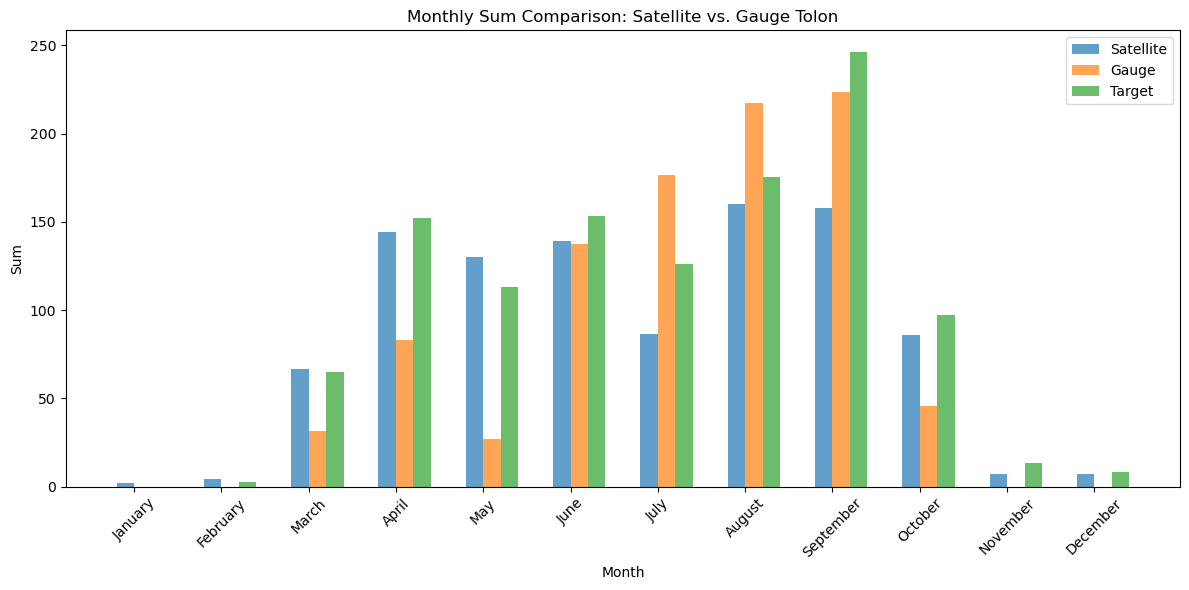

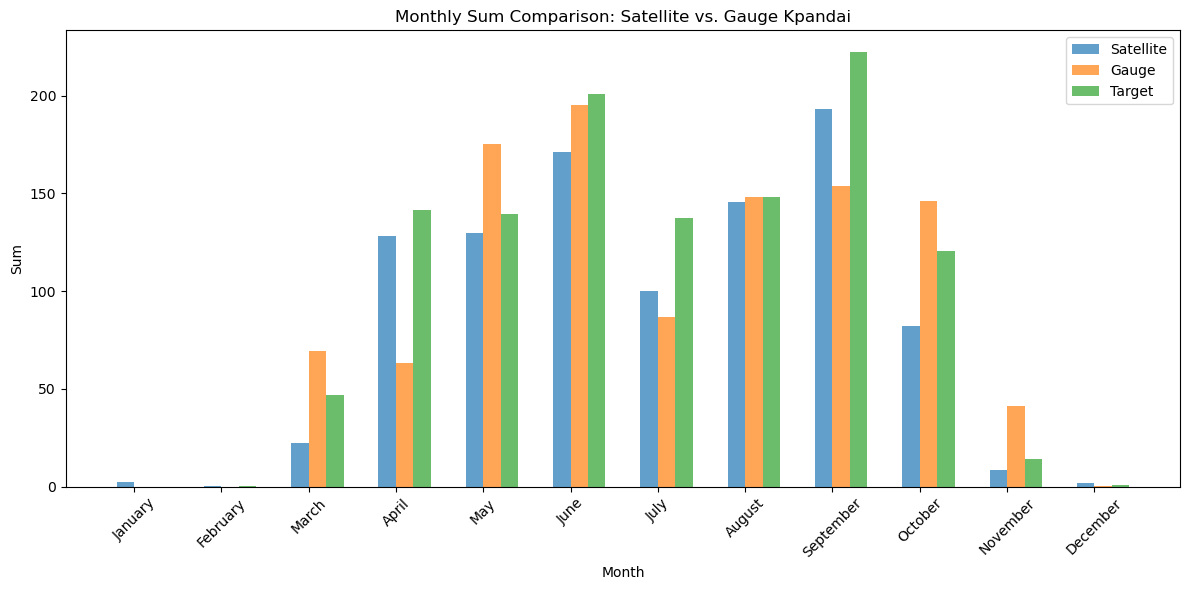

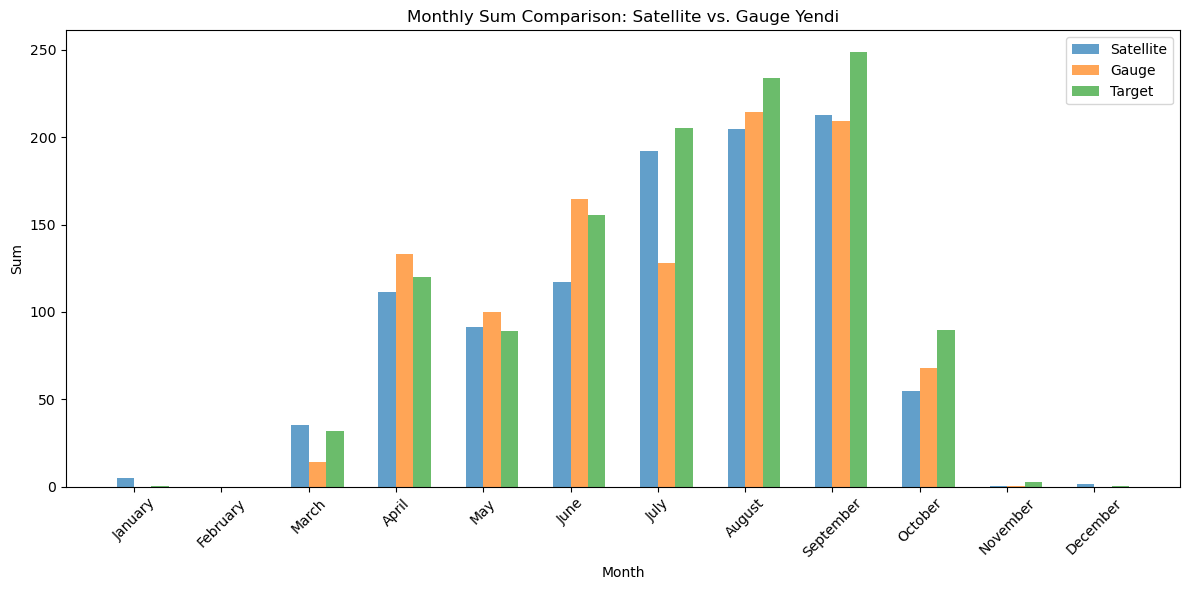

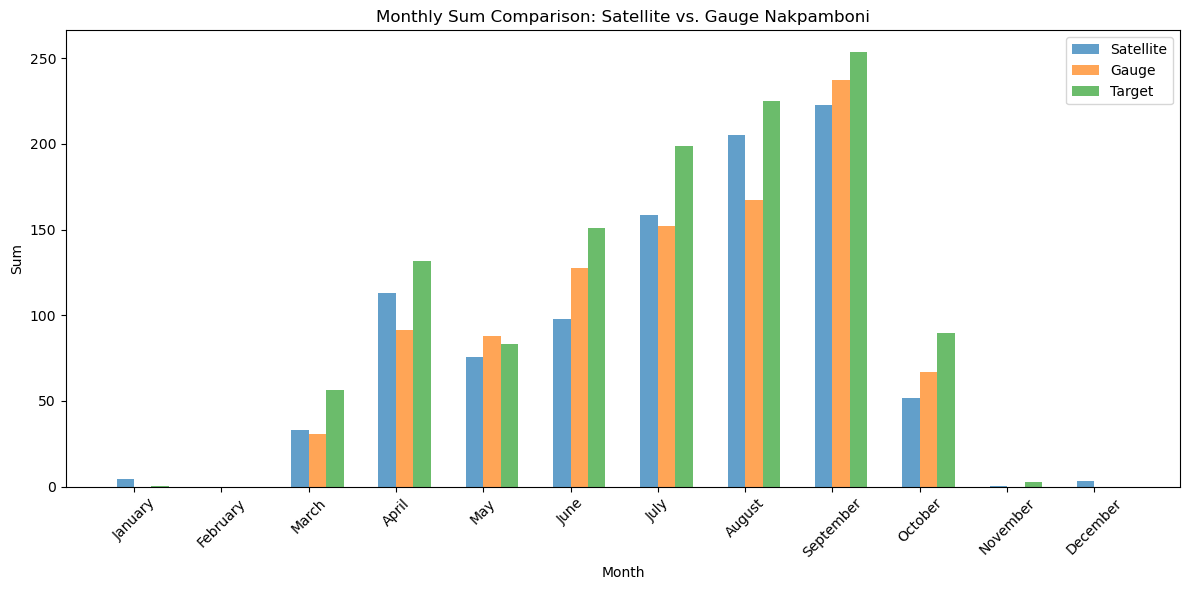

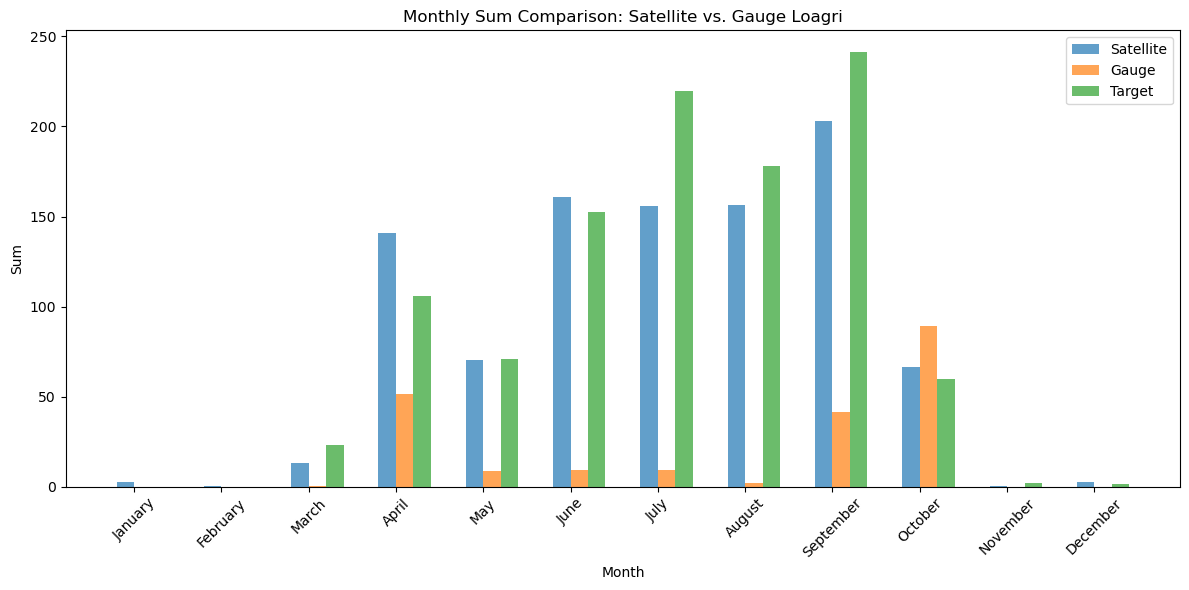

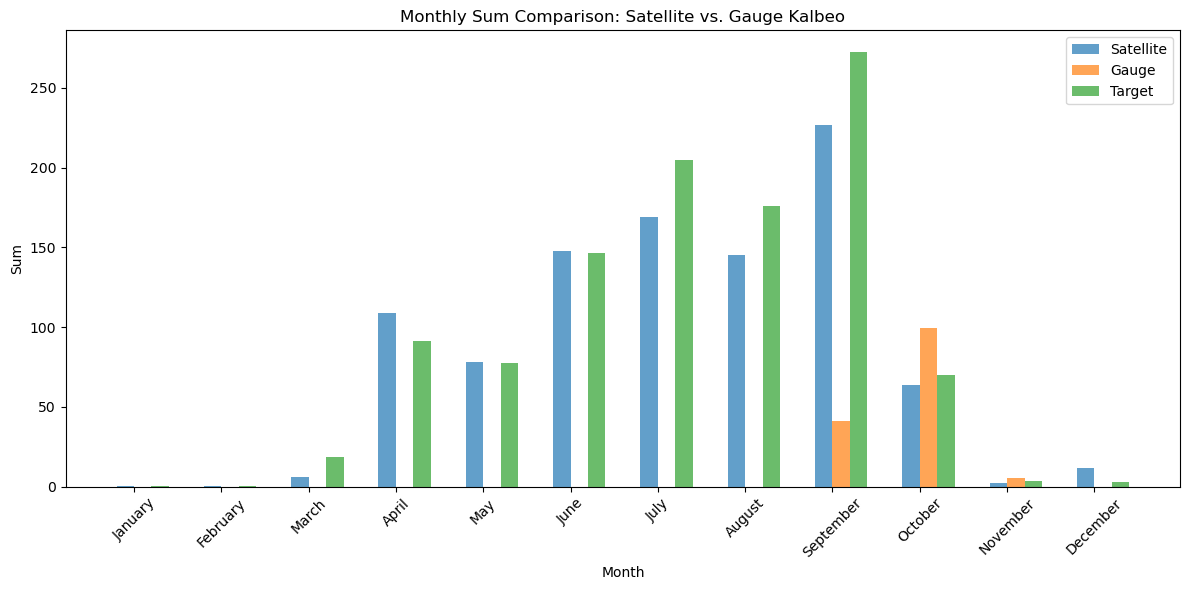

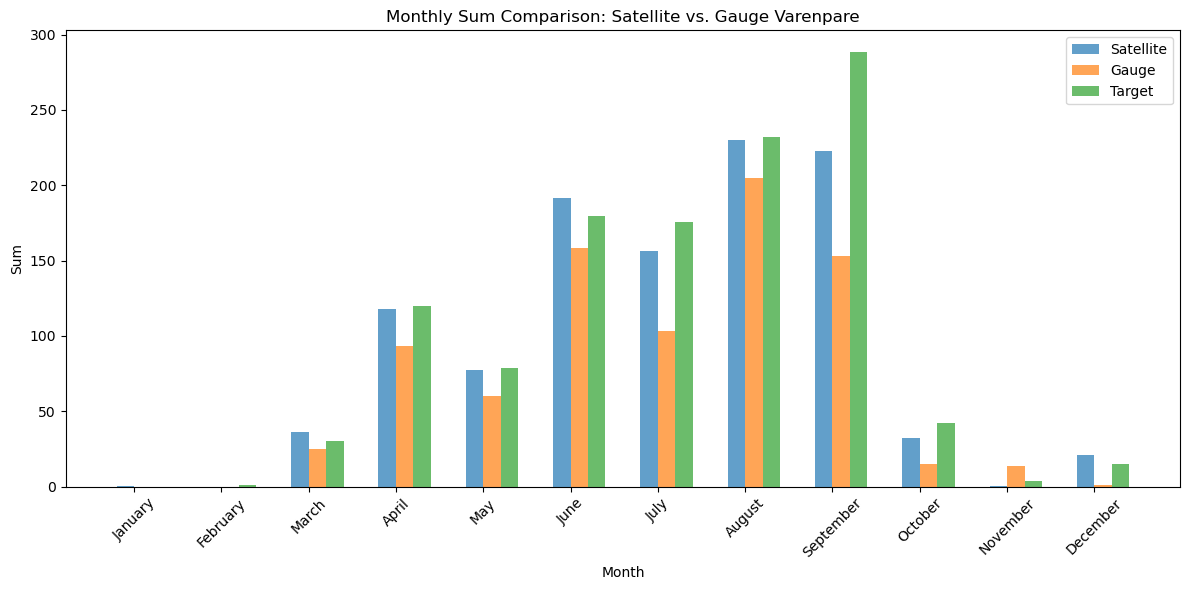

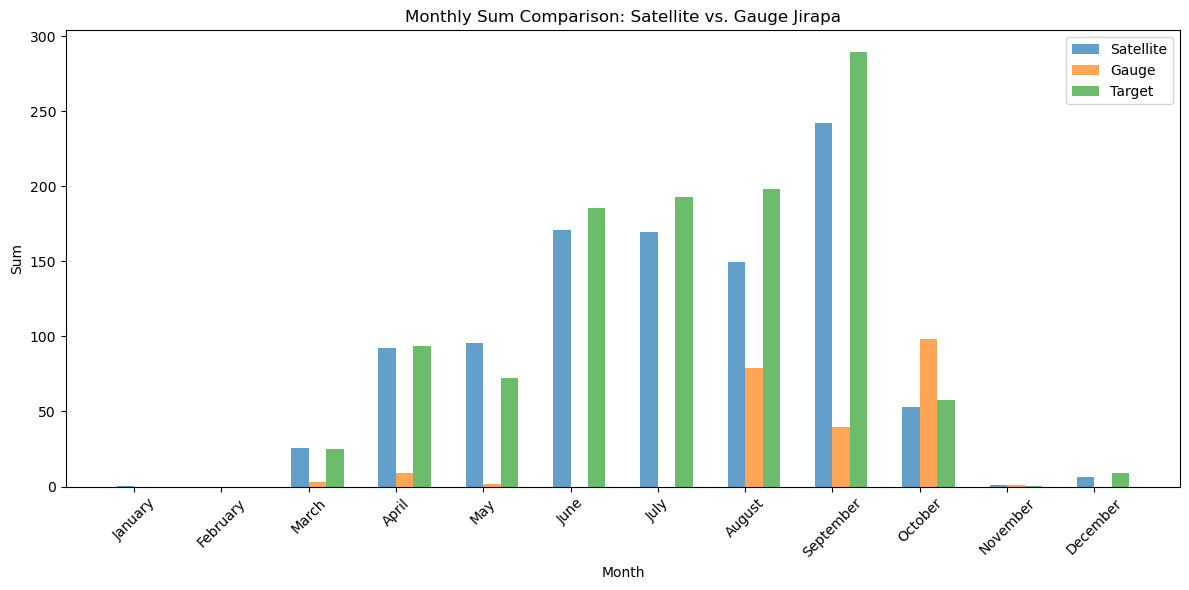

In [10]:
hist_plot(df_pred, combined_station_data, df_target, 'Tolon')
hist_plot(df_pred, combined_station_data, df_target, 'Kpandai')
hist_plot(df_pred, combined_station_data, df_target, 'Yendi')
hist_plot(df_pred, combined_station_data, df_target, 'Nakpamboni')
hist_plot(df_pred, combined_station_data, df_target, 'Loagri')
hist_plot(df_pred, combined_station_data, df_target, 'Kalbeo')
hist_plot(df_pred, combined_station_data, df_target, 'Varenpare')
hist_plot(df_pred, combined_station_data, df_target, 'Jirapa')